In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb; sb.set()
import matplotlib.pyplot as plt
import math
import random
import sklearn
import Bio
from collections import Counter
from Bio import SeqIO, AlignIO, Phylo
from Bio.Alphabet import IUPAC,generic_alphabet,generic_dna
from Bio.SeqUtils import GC
from sklearn.metrics import pairwise_distances
from matplotlib.animation import FuncAnimation

### Load and visualize the alignments as dataframes:

In [2]:
alignment1 = pd.read_csv('DATA1/B16-4-R1_MapGeneious.csv')
alignment2 = pd.read_csv('DATA1/B16-8-R1_MapGeneious.csv')
alignment3 = pd.read_csv('DATA1/B16-11-R1_MapGeneious.csv')

alignment4 = pd.read_csv('DATA1/40uM-10-R2_GeneiousMap.csv')
alignment5 = pd.read_csv('DATA1/40uM-30-R2_GeneiousMap.csv')
alignment6 = pd.read_csv('DATA1/40uM-50-R2_GeneiousMap.csv')

alignment7 = pd.read_csv('DATA1/80uM-10-R2_GeneiousMap.csv')
alignment8 = pd.read_csv('DATA1/80uM-30-R2_GeneiousMap.csv')
alignment9 = pd.read_csv('DATA1/80uM-50-R2_GeneiousMap.csv')

In [3]:
print(alignment1.shape,alignment2.shape,alignment3.shape)
print(alignment4.shape,alignment5.shape,alignment6.shape)
print(alignment7.shape,alignment8.shape,alignment9.shape)

(1575, 2) (1884, 2) (1506, 2)
(69083, 2) (74254, 2) (10495, 2)
(22819, 2) (24026, 2) (3371, 2)


In [7]:
alignment9.tail(3)

,sequenceNames,alignedSequences
3368,M02137_143_000000000_APU54_1_1104_9976_14216_2...,ATTGGCTTGATT---GT---G---AAT-A--CT---GTTGAG-AAC...
3369,M02137_143_000000000_APU54_1_2109_3654_11647_2...,TTGGCTTCGATT---GT---G---AAT-A--CT---GTTGAG-AAC...
3370,M02137_143_000000000_APU54_1_1117_16019_10186_...,TTGGCTTCGATT---GT---G---AAT-A--CT---GTTGAG-AAC...


### Check for errors in the dataframes and correct them:

In [8]:
print(alignment1.loc[alignment1['alignedSequences']=='(missing)'])
print(alignment2.loc[alignment2['alignedSequences']=='(missing)'])
print(alignment3.loc[alignment3['alignedSequences']=='(missing)'])

print(alignment4.loc[alignment4['alignedSequences']=='(missing)'])
print(alignment5.loc[alignment5['alignedSequences']=='(missing)'])
print(alignment6.loc[alignment6['alignedSequences']=='(missing)'])

print(alignment7.loc[alignment7['alignedSequences']=='(missing)'])
print(alignment8.loc[alignment8['alignedSequences']=='(missing)'])
print(alignment9.loc[alignment9['alignedSequences']=='(missing)'])

"""Are there any missing values captured in the DataFrame?"""

Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []
Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []
Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []
Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []
Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []
Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []
Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []
Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []
Empty DataFrame
Columns: [sequenceNames, alignedSequences]
Index: []


'Are there any missing values captured in the DataFrame?'

In [9]:
print(alignment1['alignedSequences'].isnull().sum())
print(alignment2['alignedSequences'].isnull().sum())
print(alignment3['alignedSequences'].isnull().sum())

print(alignment4['alignedSequences'].isnull().sum())
print(alignment5['alignedSequences'].isnull().sum())
print(alignment6['alignedSequences'].isnull().sum())

print(alignment7['alignedSequences'].isnull().sum())
print(alignment8['alignedSequences'].isnull().sum())
print(alignment9['alignedSequences'].isnull().sum())

"""Are there any null values?"""

0
0
0
0
0
0
0
0
0


'Are there any null values?'

In [10]:
print(alignment1.dtypes,'\n\n',alignment2.dtypes,'\n\n',alignment3.dtypes)
print(alignment4.dtypes,'\n\n',alignment5.dtypes,'\n\n',alignment6.dtypes)
print(alignment7.dtypes,'\n\n',alignment8.dtypes,'\n\n',alignment9.dtypes)

"""Alignment types should be objects"""

sequenceNames       object
alignedSequences    object
dtype: object 

 sequenceNames       object
alignedSequences    object
dtype: object 

 sequenceNames       object
alignedSequences    object
dtype: object
sequenceNames       object
alignedSequences    object
dtype: object 

 sequenceNames       object
alignedSequences    object
dtype: object 

 sequenceNames       object
alignedSequences    object
dtype: object
sequenceNames       object
alignedSequences    object
dtype: object 

 sequenceNames       object
alignedSequences    object
dtype: object 

 sequenceNames       object
alignedSequences    object
dtype: object


'Alignment types should be objects'

In [11]:
print(alignment1.shape,alignment2.shape,alignment3.shape)
print(alignment4.shape,alignment5.shape,alignment6.shape)
print(alignment7.shape,alignment8.shape,alignment9.shape)

(1575, 2) (1884, 2) (1506, 2)
(69083, 2) (74254, 2) (10495, 2)
(22819, 2) (24026, 2) (3371, 2)


### Detecting unique sequences

In [12]:
def uniqueSequences(file):
    name = []
    seq = []
    percentage = []
    with open(file, 'r') as file:
        for line in file:
            values = line.split(' ')
            name.append(values[0])
            seq.append(values[1])
    s = np.array(seq)
    u, counts = np.unique(s, return_counts = True)
    return u, len(counts),len(seq),len(counts)*100/len(seq)

In [13]:
s1t1_uniques, s1t1_UniqueCounts, s1t1_TotalSeqs, s1t1_UniqueFreq = uniqueSequences('DATA1/B16-4-R1_MapGeneious.phy')
s1t2_uniques, s1t2_UniqueCounts, s1t2_TotalSeqs, s1t2_UniqueFreq = uniqueSequences('DATA1/B16-8-R1_MapGeneious.phy')
s1t3_uniques, s1t3_UniqueCounts, s1t3_TotalSeqs, s1t3_UniqueFreq = uniqueSequences('DATA1/B16-11-R1_MapGeneious.phy')

s2t1_uniques, s2t1_UniqueCounts, s2t1_TotalSeqs, s2t1_UniqueFreq = uniqueSequences('DATA1/40uM-10-R2_GeneiousMap.phy')
s2t2_uniques, s2t2_UniqueCounts, s2t2_TotalSeqs, s2t2_UniqueFreq = uniqueSequences('DATA1/40uM-30-R2_GeneiousMap.phy')
s2t3_uniques, s2t3_UniqueCounts, s2t3_TotalSeqs, s2t3_UniqueFreq = uniqueSequences('DATA1/40uM-50-R2_GeneiousMap.phy')

s3t1_uniques, s3t1_UniqueCounts, s3t1_TotalSeqs, s3t1_UniqueFreq = uniqueSequences('DATA1/80uM-10-R2_GeneiousMap.phy')
s3t2_uniques, s3t2_UniqueCounts, s3t2_TotalSeqs, s3t2_UniqueFreq = uniqueSequences('DATA1/80uM-30-R2_GeneiousMap.phy')
s3t3_uniques, s3t3_UniqueCounts, s3t3_TotalSeqs, s3t3_UniqueFreq = uniqueSequences('DATA1/80uM-50-R2_GeneiousMap.phy')

In [14]:
print(type(s3t3_uniques))

<class 'numpy.ndarray'>


In [15]:
print(s1t1_UniqueCounts,s1t2_UniqueCounts,s1t3_UniqueCounts)
print(s2t1_UniqueCounts,s2t2_UniqueCounts,s2t3_UniqueCounts)
print(s3t1_UniqueCounts,s3t2_UniqueCounts,s3t3_UniqueCounts)

270 527 410
6529 7238 1794
2375 2568 669


In [35]:
s3t3_count,s3t3_unique,s3t3_top,s3t3_freq=alignment9.alignedSequences.describe()
s3t3_freq*100/s3t3_count

36.19104123405518

In [44]:
alignments=[alignment1,alignment2,alignment3,alignment4,alignment5,alignment6,alignment7,alignment8,alignment9]
for alignment in alignments:
    return freq*100/count

SyntaxError: 'return' outside function (<ipython-input-44-d1524f859089>, line 3)

In [17]:
print(s1t1_TotalSeqs,s1t2_TotalSeqs,s1t3_TotalSeqs)
print(s2t1_TotalSeqs,s2t2_TotalSeqs,s2t3_TotalSeqs)
print(s3t1_TotalSeqs,s3t2_TotalSeqs,s3t3_TotalSeqs)

1576 1885 1507
69084 74255 10496
22820 24027 3372


In [18]:
print(s1t1_UniqueFreq,s1t2_UniqueFreq,s1t3_UniqueFreq)
print(s2t1_UniqueFreq,s2t2_UniqueFreq,s2t3_UniqueFreq)
print(s3t1_UniqueFreq,s3t2_UniqueFreq,s3t3_UniqueFreq)

17.131979695431472 27.957559681697614 27.2063702720637
9.450813502402871 9.747491751397213 17.0922256097561
10.407537248028046 10.68797602696966 19.839857651245552


In [19]:
# plt.barplot(unique_s1)
# plt.barplot(unique_s2)
# plt.barplot(unique_s3)

### Sequence profile (GC, AT, Base content):

In [20]:
def uniqueSequences(file):
    name = []
    seq = []
    percentage = []
    with open(file, 'r') as file:
        for line in file:
            values = line.split(' ')
            name.append(values[0])
            seq.append(values[1])
    s = np.array(seq)
    u, counts = np.unique(s, return_counts = True)
    return u, len(counts),len(seq),len(counts)*100/len(seq)

In [21]:
def GC_AT_content(file):
    name = []
    seq = []
    with open(file, 'r') as file:
        for line in file:
            seq.append(line.split(' ')[1])
    u = np.unique(np.array(seq))        
    G = np.char.count(u, 'G')
    C = np.char.count(u, 'C')
    A = np.char.count(u, 'A')
    T = np.char.count(u, 'T')
    GC = G + C
    AT = A + T
    baseProfile = pd.DataFrame(np.vstack((G, C, A, T, GC, AT)), index=['G','C','A','T','GC','AT'])
    baseProfile['Mean'] = baseProfile.mean(axis=1)
    baseProfile['Percent'] = baseProfile['Mean'] * 100 / (baseProfile.iloc[-2,-1] + baseProfile.iloc[-1,-1])
    return baseProfile

In [22]:
GC_AT_s1t1 = GC_AT_content('DATA1/B16-4-R1_MapGeneious.phy')
GC_AT_s1t2 = GC_AT_content('DATA1/B16-8-R1_MapGeneious.phy')
GC_AT_s1t3 = GC_AT_content('DATA1/B16-11-R1_MapGeneious.phy')
GC_AT_s2t1 = GC_AT_content('DATA1/40uM-10-R2_GeneiousMap.phy')
GC_AT_s2t2 = GC_AT_content('DATA1/40uM-30-R2_GeneiousMap.phy')
GC_AT_s2t3 = GC_AT_content('DATA1/40uM-50-R2_GeneiousMap.phy')
GC_AT_s3t1 = GC_AT_content('DATA1/80uM-10-R2_GeneiousMap.phy')
GC_AT_s3t2 = GC_AT_content('DATA1/80uM-30-R2_GeneiousMap.phy')
GC_AT_s3t3 = GC_AT_content('DATA1/80uM-50-R2_GeneiousMap.phy')

In [23]:
GC_AT_s3t3

,0,1,2,3,4,5,6,7,8,9,...,661,662,663,664,665,666,667,668,Mean,Percent
G,0,39,36,38,38,37,45,35,35,35,...,37,42,41,27,29,34,39,37,35.644245,23.543234
C,0,32,29,33,39,33,24,33,34,33,...,32,23,35,37,36,35,33,31,33.288490,21.987244
A,0,32,32,31,26,30,33,31,31,30,...,32,35,33,23,26,27,29,34,29.702541,19.618703
T,0,51,54,49,49,52,49,52,51,53,...,51,52,43,64,61,55,51,49,52.763827,34.850818
GC,0,71,65,71,77,70,69,68,69,68,...,69,65,76,64,65,69,72,68,68.932735,45.530478
AT,0,83,86,80,75,82,82,83,82,83,...,83,87,76,87,87,82,80,83,82.466368,54.469522


In [57]:
print(type(GC_AT_s3t3))

<class 'pandas.core.frame.DataFrame'>


In [59]:
#GC_AT_s1t3.to_csv('GC_AT_s1t3.csv', index = True)

In [60]:
GC_content_s1 = [GC_AT_s1t1.iloc[-2,-1], GC_AT_s1t2.iloc[-2,-1], GC_AT_s1t3.iloc[-2,-1]]
GC_content_s2 = [GC_AT_s2t1.iloc[-2,-1], GC_AT_s2t2.iloc[-2,-1], GC_AT_s2t3.iloc[-2,-1]]
GC_content_s3 = [GC_AT_s3t1.iloc[-2,-1], GC_AT_s3t2.iloc[-2,-1], GC_AT_s3t3.iloc[-2,-1]]

AT_content_s1 = [GC_AT_s1t1.iloc[-1,-1], GC_AT_s1t2.iloc[-1,-1], GC_AT_s1t3.iloc[-1,-1]]
AT_content_s2 = [GC_AT_s2t1.iloc[-1,-1], GC_AT_s2t2.iloc[-1,-1], GC_AT_s2t3.iloc[-1,-1]]
AT_content_s3 = [GC_AT_s3t1.iloc[-1,-1], GC_AT_s3t2.iloc[-1,-1], GC_AT_s3t3.iloc[-1,-1]]

In [54]:
GC_content = (GC_content_s1, GC_content_s2, GC_content_s3)
AT_content = (AT_content_s1, AT_content_s2, AT_content_s3)

In [62]:
GC_content_s2

[44.9685544097893, 45.045558397086005, 45.609142285276974]

In [55]:
GC_content

([44.334156418844586, 40.512591045815, 40.70689682909957],
 [44.9685544097893, 45.045558397086005, 45.609142285276974],
 [44.91248780704088, 44.94025435125062, 45.53047805224809])

In [23]:
AT_content

([55.66584358115542, 59.48740895418501, 59.293103170900444],
 [55.031445590210694, 54.954441602914, 54.39085771472302],
 [55.08751219295912, 55.05974564874938, 54.469521947751915])

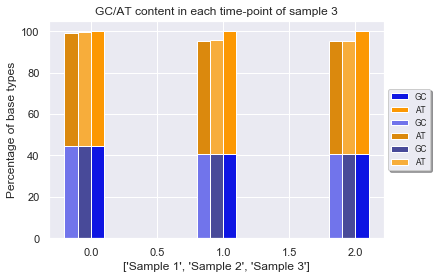

In [24]:
labels = ['Sample 1', 'Sample 2', 'Sample 3']
fig, ax = plt.subplots()

s1_bar_list = [ax.bar([0,1,2], GC_content_s1, align='edge',width= 0.1, label = 'GC',color='#0e15e3'),
               ax.bar([0,1,2], AT_content_s1, align='edge',width= 0.1, bottom = GC_content_s1,label = 'AT',color='#fc9803')]

s2_bar_list = [ax.bar([0,1,2], GC_content_s2, align='edge',width= -0.2, label = 'GC',color='#7174eb'),
               ax.bar([0,1,2], AT_content_s2, align='edge',width= -0.2, bottom = GC_content_s1,label = 'AT',color='#db890d')]

s3_bar_list = [ax.bar([0,1,2], GC_content_s3, align='edge',width= -0.1, label = 'GC',color='#484a99'),
               ax.bar([0,1,2], AT_content_s3, align='edge',width= -0.1, bottom = GC_content_s1,label = 'AT',color='#f7ad3b')]

plt.xlabel(labels)
plt.ylabel('Percentage of base types')
plt.title('GC/AT content in each time-point of sample 3')
ax.legend(fontsize = 'small',loc='center left',bbox_to_anchor=(1, 0.5),ncol=1,fancybox=True,shadow=True)

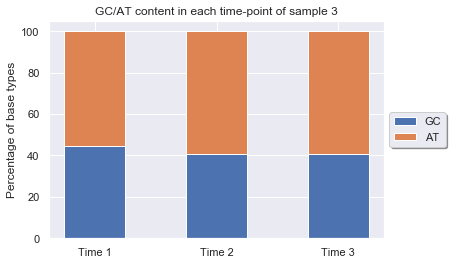

In [25]:
labels = ['Time 1', 'Time 2', 'Time 3']
width = 0.5
fig, ax = plt.subplots()
ax.bar(labels, GC_content_s1, width, label = 'GC')
ax.bar(labels, AT_content_s1, width, bottom = GC_content_s1,label = 'AT')
ax.set_ylabel('Percentage of base types')
ax.set_title('GC/AT content in each time-point of sample 3')
ax.legend()
plt.legend(fontsize = 'small')
ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1, fancybox = True, shadow = True)

In [26]:
G = [(GC_AT_s1t1.iloc[0,-1]*100/GC_AT_s1t1.iloc[0:4,-1]), (GC_AT_s1t2.iloc[0,-1]*100/GC_AT_s1t1.iloc[0:4,-1]), (GC_AT_s1t3.iloc[0,-1]*100/GC_AT_s1t1.iloc[0:4,-1])]
C = [(GC_AT_s1t1.iloc[1,-1]*100/GC_AT_s1t1.iloc[0:4,-1]), (GC_AT_s1t2.iloc[1,-1]*100/GC_AT_s1t1.iloc[0:4,-1]), (GC_AT_s1t3.iloc[1,-1]*100/GC_AT_s1t1.iloc[0:4,-1])]
A = [(GC_AT_s1t1.iloc[2,-1]*100/GC_AT_s1t1.iloc[0:4,-1]), (GC_AT_s1t2.iloc[2,-1]*100/GC_AT_s1t1.iloc[0:4,-1]), (GC_AT_s1t3.iloc[2,-1]*100/GC_AT_s1t1.iloc[0:4,-1])]
T = [(GC_AT_s1t1.iloc[3,-1]*100/GC_AT_s1t1.iloc[0:4,-1]), (GC_AT_s1t2.iloc[3,-1]*100/GC_AT_s1t1.iloc[0:4,-1]), (GC_AT_s1t3.iloc[3,-1]*100/GC_AT_s1t1.iloc[0:4,-1])]

In [27]:
G = [GC_AT_s1t1.iloc[0,-1], GC_AT_s1t2.iloc[0,-1], GC_AT_s1t3.iloc[0,-1]]
C = [GC_AT_s1t1.iloc[1,-1], GC_AT_s1t2.iloc[1,-1], GC_AT_s1t3.iloc[1,-1]]
A = [GC_AT_s1t1.iloc[2,-1], GC_AT_s1t2.iloc[2,-1], GC_AT_s1t3.iloc[2,-1]]
T = [GC_AT_s1t1.iloc[3,-1], GC_AT_s1t2.iloc[3,-1], GC_AT_s1t3.iloc[3,-1]]
baseContent = pd.DataFrame(list(zip(G,C,A,T)), columns = ['G','C','A','T'], index = ['Time 1', 'Time 2', 'Time 3'])
baseContent.head(3)

,G,C,A,T
Time 1,21.905484,22.428673,18.942376,36.723468
Time 2,19.519228,20.993363,18.821936,40.665473
Time 3,19.704307,21.002590,18.605512,40.687591


Text(0.5, 1.0, 'Base content in each time-point')

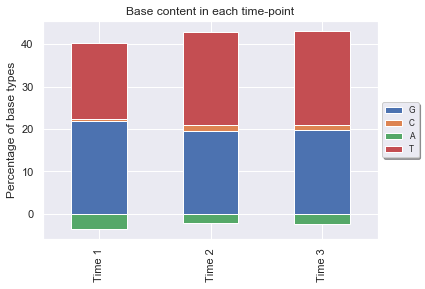

In [28]:
baseContent.diff(axis=1).fillna(baseContent).astype(baseContent.dtypes).plot.bar(stacked=True)
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5),ncol=1, fancybox=True, shadow=True)
plt.ylabel('Percentage of base types')
plt.title('Base content in each time-point')

### Mutation profile:

#### Detect indel mutations:

Mutations can be of different types. Substitutions are replacements of one letter by another. Insertions (in) refers to extra letters inserted into the sequence. Deletions (dels) happen when a letter is lost. Indels shift the sequence frame.

In [29]:
ref1='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACTTCCATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGG-CAGATTTGTCTTTT-CCTGGTCACTATAA-TGTATTCTTC------T------T------AT-AGTGAGTCGTATTAG'
ref2='CTTTAAGGTTC-A---GTGAATACTGTTGAGAACGCTGGTTCGT-CACTTCC-ATCGCGAG-CTGCCTCC-CGTGCATCCGAAGATGTTCTCAAGCTCTAAGGGCAGATTTGTCTTTT--CCTGGT-CACTATAATGTATTCTTCT------------T---------ATA-GTGAGTC-GTATTAG-'
ref3='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACT-TC--CATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGGCAGATTTGTCTTTT-CCTGGTCACTATAATGTATTCTTCT--------T---ATAGTGAGTCGTATTAG'

ref4='CTTTAA---G-GT-TC---A---G---T---G---A---A---T---AC--T-G-TT-G-AG-A--A-CG-CTGG-TTCG-T--CA--C-T--T-C--CA-T--CGCGAG--CTG-CCTCCC-GTG-CATCC-GA-A-GA-TGTT-C-TCAAGCTCTAA-GG-G-CAGA-TTT-GTC-TT-TT--CC-TGGTCACTAT---AA-TGT-AT---------------T---------------C----------T-----TC------T--------------T------------A-T---------A-GT-G--A-G-T----C-G-T-A-TTAG'
ref5='CTTTAAGGTTC---A---G---T---G---A---A---T-A---C--T---G-TT-G-A-GA--A-C-G-CT-GGT-T-CG-TC--AC-T---T-C-C--A-T-C-G--C-GAG-C-T-GCCTCCC-G-T-GC--A-TCC-G-A--------AGATG-TTCTCAAGCTCT-AA-GG-G-CAGA-TT-T-G-TC-TT-TT---CC-TGG-T-C------ACTATA--AT---G------------TAT---------T---------------CT------TC---------------T--------------T--------------AT---------AG-T-G-A-G-T--C-G-T-A-T-TAG'
ref6='CTTTAAGGTTC---A---G---T---G---A---AT-AC-TG-TTGAG-AA-C-G-C-TGG-TTCGTCACTT-CC-ATC-G-CGAGCTGCCTCCC-GTG-CATCCGAAG---ATGTTC-TCAAGCTCTAAGGGC-AGATTT-GTCTTTT-CC-TGGTCACTATAATGTATTCT-TC-T-------------T------ATAGT-G-AG-TC-GT-A-TTAG'

ref7='CTTTAAGGTTC-A---G---T----G---A---A---T-ACT-G-TTG-AG-AACG-CTGG-TTCGTCACT--T--CC-ATCGCGAG--CTGCCT-CCC-GTGCA-TCCGA-AGATGTTCTCAA-GCTCT-AA-GGG-CAGATTT-G-TCTT-T-T-CC-TGG-TCACT--ATAATGTA------------TTCT-----TCT------------T------AT-AG-TG-A-G--T-C-GT-A-TTAG'
ref8='CTTTAAGGTTC---A---G---T---G---A---A-T-A-C-T---GTT-GAG-AA-CG-C-T--GGTTCGTCACT--T-CCA-T--C-GCG-AG-C-TGCCTCCCGTGCATCC-GA-AGATGTT-CTCAA-GCTC-TAAGGG-CAGATTT-GTCTT-TT--CCTG-GTC-----ACT-A-TA---------------ATGTAT---T---------------C-TT-------------C---T------------T------------AT------A-G-T-GA-G-T-C-G-T-ATTAG'
ref9='CTTTAAGGTTCA---GT---G---AAT-A--CT---GTTGAG-AACG-CTGGTTC-GTCAC-TTCCA-TCGCG--AG-CTGCCTCCCGTGCATCCGAAGA--TGTTCTCAAGCTCTAAGGGCAGATTTGTC-TTTT-CCTGGTCACTATAATGTATTCTTCT-------T-----ATAGTGAGTCGT-ATTAG'


In [30]:
print(len(ref1),len(ref2),len(ref3))
print(len(ref4),len(ref5),len(ref6))
print(len(ref7),len(ref8),len(ref9))

178 188 171
335 365 221
249 302 193


In [31]:
def indels(string1, string2): 
    insertions = 0
    deletions = 0
    length = len(string1)
    for i in range(length):
        if string1[i] == '-' and string2[i] != '-':
            insertions += 1
        elif string1[i] != '-' and string2[i] == '-':
            deletions += 1
    return insertions, deletions

In [32]:
alignment1['indels'] = alignment1.alignedSequences.apply(indels, args=(ref1,))
alignment2['indels'] = alignment2.alignedSequences.apply(indels, args=(ref2,))
alignment3['indels'] = alignment3.alignedSequences.apply(indels, args=(ref3,))

alignment4['indels'] = alignment4.alignedSequences.apply(indels, args=(ref4,))
alignment5['indels'] = alignment5.alignedSequences.apply(indels, args=(ref5,))
alignment6['indels'] = alignment6.alignedSequences.apply(indels, args=(ref6,))

alignment7['indels'] = alignment7.alignedSequences.apply(indels, args=(ref7,))
alignment8['indels'] = alignment8.alignedSequences.apply(indels, args=(ref8,))
alignment9['indels'] = alignment9.alignedSequences.apply(indels, args=(ref9,))

In [33]:
print(list(alignment9['indels'].str[0]))

[0, 7, 5, 7, 2, 4, 5, 4, 4, 4, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [34]:
print('s1t1 ->','insertions: ',alignment1['indels'].str[0].sum(),', deletions: ',alignment1['indels'].str[1].sum())
print('s1t2 ->','insertions: ',alignment2['indels'].str[0].sum(),', deletions: ',alignment2['indels'].str[1].sum())
print('s1t3 ->','insertions: ',alignment3['indels'].str[0].sum(),', deletions: ',alignment3['indels'].str[1].sum())
print()
print('s2t1 ->','insertions: ',alignment4['indels'].str[0].sum(),', deletions: ',alignment4['indels'].str[1].sum())
print('s2t2 ->','insertions: ',alignment5['indels'].str[0].sum(),', deletions: ',alignment5['indels'].str[1].sum())
print('s2t3 ->','insertions: ',alignment6['indels'].str[0].sum(),', deletions: ',alignment6['indels'].str[1].sum())
print()
print('s3t1 ->','insertions: ',alignment7['indels'].str[0].sum(),', deletions: ',alignment7['indels'].str[1].sum())
print('s3t2 ->','insertions: ',alignment8['indels'].str[0].sum(),', deletions: ',alignment8['indels'].str[1].sum())
print('s3t3 ->','insertions: ',alignment9['indels'].str[0].sum(),', deletions: ',alignment9['indels'].str[1].sum())

s1t1 -> insertions:  1596 , deletions:  32
s1t2 -> insertions:  2007 , deletions:  1930
s1t3 -> insertions:  1569 , deletions:  29

s2t1 -> insertions:  70881 , deletions:  2428
s2t2 -> insertions:  76556 , deletions:  3398
s2t3 -> insertions:  15202 , deletions:  393

s3t1 -> insertions:  23372 , deletions:  740
s3t2 -> insertions:  24692 , deletions:  1044
s3t3 -> insertions:  4871 , deletions:  156


#### Calculating hamming distance (nucleotide diferences compared to the reference):

In [35]:
def hamming_distance(string1, string2): 
    distance = 0
    length = len(string1)
    for i in range(length):
        if string1[i] != string2[i]:
            distance += 1
    return distance

In [36]:
alignment1['hdTotal']=alignment1.alignedSequences.apply(hamming_distance, args=(ref1,))
alignment2['hdTotal']=alignment2.alignedSequences.apply(hamming_distance, args=(ref2,))
alignment3['hdTotal']=alignment3.alignedSequences.apply(hamming_distance, args=(ref3,))

alignment4['hdTotal']=alignment4.alignedSequences.apply(hamming_distance, args=(ref4,))
alignment5['hdTotal']=alignment5.alignedSequences.apply(hamming_distance, args=(ref5,))
alignment6['hdTotal']=alignment6.alignedSequences.apply(hamming_distance, args=(ref6,))

alignment7['hdTotal']=alignment7.alignedSequences.apply(hamming_distance, args=(ref7,))
alignment8['hdTotal']=alignment8.alignedSequences.apply(hamming_distance, args=(ref8,))
alignment9['hdTotal']=alignment9.alignedSequences.apply(hamming_distance, args=(ref9,))

In [37]:
## List of hamming distances for each sequence in the alignment
# print(list(alignment1.hdTotal))
# print(list(alignment2.hdTotal))
# print(list(alignment3.hdTotal))
# print(list(alignment4.hdTotal))
# print(list(alignment5.hdTotal))
# print(list(alignment6.hdTotal))
# print(list(alignment7.hdTotal))
# print(list(alignment8.hdTotal))
print(list(alignment9.hdTotal))

[0, 46, 15, 32, 14, 23, 44, 36, 19, 22, 44, 15, 13, 15, 14, 28, 15, 15, 14, 14, 13, 16, 14, 14, 14, 15, 14, 16, 15, 14, 15, 14, 15, 14, 16, 13, 14, 14, 14, 17, 17, 14, 14, 14, 14, 14, 14, 14, 17, 17, 29, 10, 32, 13, 15, 45, 25, 26, 36, 11, 28, 18, 45, 12, 11, 14, 41, 41, 15, 11, 15, 17, 15, 15, 22, 13, 15, 15, 14, 17, 13, 16, 13, 17, 14, 13, 15, 16, 13, 13, 14, 13, 13, 16, 14, 14, 15, 17, 14, 24, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 17, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 16, 14, 14, 14, 14, 15, 14, 14, 15, 14, 16, 14, 14, 14, 14, 14, 16, 15, 15, 15, 17, 14, 25, 14, 14, 15, 14, 14, 14, 23, 15, 14, 14, 14, 15, 14, 14, 14, 14, 14, 14, 14, 16, 18, 14, 14, 21, 14, 14, 15, 14, 14, 36, 14, 14, 14, 43, 14, 14, 14, 15, 15, 14, 14, 14, 14, 14, 14, 14, 16, 18, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 28, 14, 30, 14, 14, 14, 14, 14, 23, 14, 14, 41, 15, 14, 14, 14, 15, 17, 14, 33, 14, 14, 15, 14, 14, 18, 15, 15, 14, 16, 14, 14, 14, 14, 14, 19, 14, 14, 14, 14, 15, 24, 14, 14, 14, 

In [38]:
alignment9.shape

(3371, 4)

In [39]:
align1 = np.array(list(alignment1.hdTotal))
align2 = np.array(list(alignment2.hdTotal))
align3 = np.array(list(alignment3.hdTotal))

align4 = np.array(list(alignment4.hdTotal))
align5 = np.array(list(alignment5.hdTotal))
align6 = np.array(list(alignment6.hdTotal))

align7 = np.array(list(alignment7.hdTotal))
align8 = np.array(list(alignment8.hdTotal))
align9 = np.array(list(alignment9.hdTotal))

Text(0.5, 1.0, 'Frequency of Hamming Distance')

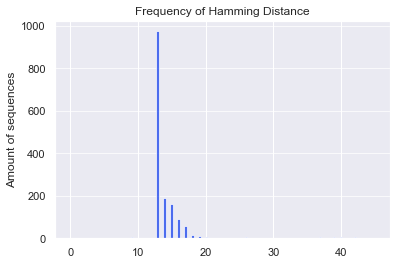

In [40]:
plt.hist(align1, 'auto', histtype='bar', rwidth=10, color = "#0937ed", alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Amount of sequences')
plt.title('Frequency of Hamming Distance')

(0.0, 200)

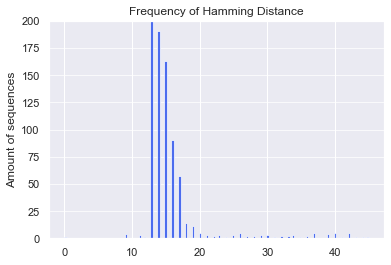

In [41]:
plt.hist(align1, 'auto', histtype='bar', rwidth=10, color = "#0937ed", alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.ylabel('Amount of sequences')
plt.title('Frequency of Hamming Distance')
plt.ylim(ymax=200)

In [42]:
# Total of hamming distance per alignment
mutationsTotal1 = alignment1.hdTotal.sum()
mutationsTotal2 = alignment2.hdTotal.sum()
mutationsTotal3 = alignment3.hdTotal.sum()

mutationsTotal4 = alignment4.hdTotal.sum()
mutationsTotal5 = alignment5.hdTotal.sum()
mutationsTotal6 = alignment6.hdTotal.sum()

mutationsTotal7 = alignment7.hdTotal.sum()
mutationsTotal8 = alignment8.hdTotal.sum()
mutationsTotal9 = alignment9.hdTotal.sum()

In [43]:
# Total mutations in each time point
# print(mutationsTotal1,mutationsTotal2,mutationsTotal3)
# print(mutationsTotal4,mutationsTotal5,mutationsTotal6)
# print(mutationsTotal7,mutationsTotal8,mutationsTotal9)

In [44]:
# print(len(alignment1),len(alignment2),len(alignment3))
# print(len(alignment4),len(alignment5),len(alignment6))
# print(len(alignment7),len(alignment8),len(alignment9))

In [45]:
# print(len(ref1),len(ref2),len(ref3))
# print(len(ref4),len(ref5),len(ref6))
# print(len(ref7),len(ref8),len(ref9))

In [46]:
totalPositions1=len(alignment1)*len(ref1)
totalPositions2=len(alignment2)*len(ref2)
totalPositions3=len(alignment3)*len(ref3)
totalPositions4=len(alignment4)*len(ref4)
totalPositions5=len(alignment5)*len(ref5)
totalPositions6=len(alignment6)*len(ref6)
totalPositions7=len(alignment7)*len(ref7)
totalPositions8=len(alignment8)*len(ref8)
totalPositions9=len(alignment9)*len(ref9)

In [47]:
s1t1_HD = mutationsTotal1*100/totalPositions1
s1t2_HD = mutationsTotal2*100/totalPositions2
s1t3_HD = mutationsTotal3*100/totalPositions3
s2t1_HD = mutationsTotal4*100/totalPositions4
s2t2_HD = mutationsTotal5*100/totalPositions5
s2t3_HD = mutationsTotal6*100/totalPositions6
s3t1_HD = mutationsTotal7*100/totalPositions7
s3t2_HD = mutationsTotal8*100/totalPositions8
s3t3_HD = mutationsTotal9*100/totalPositions9

In [48]:
profiled_HD = pd.DataFrame(np.array(([s1t1_HD,s1t2_HD,s1t3_HD],
                                     [s2t1_HD,s2t2_HD,s2t3_HD],
                                     [s3t1_HD,s3t2_HD,s3t3_HD])), 
                           index=('Sample1','Sample2', 'Sample3'),columns=('Time1','Time2', 'Time3'))

In [49]:
profiled_HD

,Time1,Time2,Time3
Sample1,8.139112,9.515461,9.946180
Sample2,4.086004,3.747109,6.560331
Sample3,5.483171,4.521771,7.582504


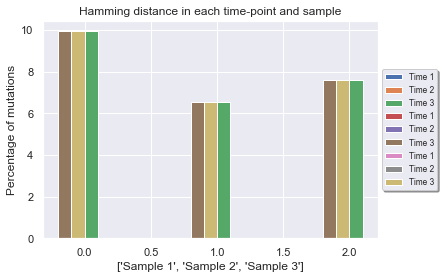

In [57]:
labels = ['Sample 1', 'Sample 2', 'Sample 3']
fig, ax = plt.subplots()

sample1_list = [plt.bar([0, 1, 2], profiled_HD.Time1, label = 'Time 1',align='edge', width= 0.1),
               plt.bar([0, 1, 2], profiled_HD.Time2, label = 'Time 2',align='edge', width= 0.1),
               plt.bar([0, 1, 2], profiled_HD.Time3, label = 'Time 3',align='edge', width= 0.1)]

sample2_list = [plt.bar([0, 1, 2], profiled_HD.Time1, label = 'Time 1',align='edge', width= -0.2),
               plt.bar([0, 1, 2], profiled_HD.Time2, label = 'Time 2',align='edge', width= -0.2),
               plt.bar([0, 1, 2], profiled_HD.Time3, label = 'Time 3',align='edge', width= -0.2)]

sample3_list = [plt.bar([0, 1, 2], profiled_HD.Time1, label = 'Time 1',align='edge', width= -0.1),
               plt.bar([0, 1, 2], profiled_HD.Time2, label = 'Time 2',align='edge', width= -0.1),
               plt.bar([0, 1, 2], profiled_HD.Time3, label = 'Time 3',align='edge', width= -0.1)]

plt.xlabel(labels)
plt.ylabel('Percentage of mutations')
plt.title('Hamming distance in each time-point and sample')
ax.legend(fontsize = 'small',loc='center left',bbox_to_anchor=(1, 0.5),ncol=1,fancybox=True,shadow=True)


#### Calculating hamming distance per segment of the sequence:

It is interesting to see the mutational profile along the sequence because not all the nucleotides in the sequence are equally paired nor have the same structural and functional role. Here, the sequence was divided in three segments.

In [195]:
print(len(ref1),len(ref2),len(ref3))

178 188 171


In [196]:
alignment1['seg1'] = alignment1['alignedSequences'].str[0:60]
alignment1['seg2'] = alignment1['alignedSequences'].str[60:120]
alignment1['seg3'] = alignment1['alignedSequences'].str[120:-1]
alignment2['seg1'] = alignment2['alignedSequences'].str[0:60]
alignment2['seg2'] = alignment2['alignedSequences'].str[60:120]
alignment2['seg3'] = alignment2['alignedSequences'].str[120:-1]
alignment3['seg1'] = alignment3['alignedSequences'].str[0:60]
alignment3['seg2'] = alignment3['alignedSequences'].str[60:120]
alignment3['seg3'] = alignment3['alignedSequences'].str[120:-1]

In [197]:
print(len(ref4),len(ref5),len(ref6))

335 365 221


In [198]:
alignment4['seg1'] = alignment4['alignedSequences'].str[0:110]
alignment4['seg2'] = alignment4['alignedSequences'].str[110:220]
alignment4['seg3'] = alignment4['alignedSequences'].str[220:-1]
alignment5['seg1'] = alignment5['alignedSequences'].str[0:120]
alignment5['seg2'] = alignment5['alignedSequences'].str[120:240]
alignment5['seg3'] = alignment5['alignedSequences'].str[240:-1]
alignment6['seg1'] = alignment6['alignedSequences'].str[0:73]
alignment6['seg2'] = alignment6['alignedSequences'].str[73:146]
alignment6['seg3'] = alignment6['alignedSequences'].str[146:-1]

In [199]:
print(len(ref7),len(ref8),len(ref9))

249 302 193


In [200]:
alignment7['seg1'] = alignment7['alignedSequences'].str[0:83]
alignment7['seg2'] = alignment7['alignedSequences'].str[83:166]
alignment7['seg3'] = alignment7['alignedSequences'].str[166:-1]
alignment8['seg1'] = alignment8['alignedSequences'].str[0:100]
alignment8['seg2'] = alignment8['alignedSequences'].str[100:200]
alignment8['seg3'] = alignment8['alignedSequences'].str[200:-1]
alignment9['seg1'] = alignment9['alignedSequences'].str[0:64]
alignment9['seg2'] = alignment9['alignedSequences'].str[64:128]
alignment9['seg3'] = alignment9['alignedSequences'].str[128:-1]

In [87]:
ref1='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACTTCCATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGG-CAGATTTGTCTTTT-CCTGGTCACTATAA-TGTATTCTTC------T------T------AT-AGTGAGTCGTATTAG'
ref2='CTTTAAGGTTC-A---GTGAATACTGTTGAGAACGCTGGTTCGT-CACTTCC-ATCGCGAG-CTGCCTCC-CGTGCATCCGAAGATGTTCTCAAGCTCTAAGGGCAGATTTGTCTTTT--CCTGGT-CACTATAATGTATTCTTCT------------T---------ATA-GTGAGTC-GTATTAG-'
ref3='CTTTAAGGTTCA---GTGAATACTGTTGAGAACGCTGGTTCGTCACT-TC--CATCGCGAGCTGCCTCCCGTGCATCCGAAGATGTTCTCAAGCTCTAAGGGCAGATTTGTCTTTT-CCTGGTCACTATAATGTATTCTTCT--------T---ATAGTGAGTCGTATTAG'

ref4='CTTTAA---G-GT-TC---A---G---T---G---A---A---T---AC--T-G-TT-G-AG-A--A-CG-CTGG-TTCG-T--CA--C-T--T-C--CA-T--CGCGAG--CTG-CCTCCC-GTG-CATCC-GA-A-GA-TGTT-C-TCAAGCTCTAA-GG-G-CAGA-TTT-GTC-TT-TT--CC-TGGTCACTAT---AA-TGT-AT---------------T---------------C----------T-----TC------T--------------T------------A-T---------A-GT-G--A-G-T----C-G-T-A-TTAG'
ref5='CTTTAAGGTTC---A---G---T---G---A---A---T-A---C--T---G-TT-G-A-GA--A-C-G-CT-GGT-T-CG-TC--AC-T---T-C-C--A-T-C-G--C-GAG-C-T-GCCTCCC-G-T-GC--A-TCC-G-A--------AGATG-TTCTCAAGCTCT-AA-GG-G-CAGA-TT-T-G-TC-TT-TT---CC-TGG-T-C------ACTATA--AT---G------------TAT---------T---------------CT------TC---------------T--------------T--------------AT---------AG-T-G-A-G-T--C-G-T-A-T-TAG'
ref6='CTTTAAGGTTC---A---G---T---G---A---AT-AC-TG-TTGAG-AA-C-G-C-TGG-TTCGTCACTT-CC-ATC-G-CGAGCTGCCTCCC-GTG-CATCCGAAG---ATGTTC-TCAAGCTCTAAGGGC-AGATTT-GTCTTTT-CC-TGGTCACTATAATGTATTCT-TC-T-------------T------ATAGT-G-AG-TC-GT-A-TTAG'

ref7='CTTTAAGGTTC-A---G---T----G---A---A---T-ACT-G-TTG-AG-AACG-CTGG-TTCGTCACT--T--CC-ATCGCGAG--CTGCCT-CCC-GTGCA-TCCGA-AGATGTTCTCAA-GCTCT-AA-GGG-CAGATTT-G-TCTT-T-T-CC-TGG-TCACT--ATAATGTA------------TTCT-----TCT------------T------AT-AG-TG-A-G--T-C-GT-A-TTAG'
ref8='CTTTAAGGTTC---A---G---T---G---A---A-T-A-C-T---GTT-GAG-AA-CG-C-T--GGTTCGTCACT--T-CCA-T--C-GCG-AG-C-TGCCTCCCGTGCATCC-GA-AGATGTT-CTCAA-GCTC-TAAGGG-CAGATTT-GTCTT-TT--CCTG-GTC-----ACT-A-TA---------------ATGTAT---T---------------C-TT-------------C---T------------T------------AT------A-G-T-GA-G-T-C-G-T-ATTAG'
ref9='CTTTAAGGTTCA---GT---G---AAT-A--CT---GTTGAG-AACG-CTGGTTC-GTCAC-TTCCA-TCGCG--AG-CTGCCTCCCGTGCATCCGAAGA--TGTTCTCAAGCTCTAAGGGCAGATTTGTC-TTTT-CCTGGTCACTATAATGTATTCTTCT-------T-----ATAGTGAGTCGT-ATTAG'


In [211]:
# Here the reference sequence of each alignment is being divided in the three segments.
ref1_seg1 = ref1[0:60]
ref1_seg2 = ref1[60:120]
ref1_seg3 = ref1[120:-1]
ref2_seg1 = ref2[0:60]
ref2_seg2 = ref2[60:120]
ref2_seg3 = ref2[120:-1]
ref3_seg1 = ref3[0:60]
ref3_seg2 = ref3[60:120]
ref3_seg3 = ref3[120:-1]

In [212]:
ref4_seg1 = ref4[0:110]
ref4_seg2 = ref4[110:220]
ref4_seg3 = ref4[220:-1]
ref5_seg1 = ref5[0:120]
ref5_seg2 = ref5[120:240]
ref5_seg3 = ref5[240:-1]
ref6_seg1 = ref6[0:73]
ref6_seg2 = ref6[73:146]
ref6_seg3 = ref6[146:-1]

In [213]:
ref7_seg1 = ref7[0:83]
ref7_seg2 = ref7[83:166]
ref7_seg3 = ref7[166:-1]
ref8_seg1 = ref8[0:100]
ref8_seg2 = ref8[100:200]
ref8_seg3 = ref8[200:-1]
ref9_seg1 = ref9[0:64]
ref9_seg2 = ref9[64:128]
ref9_seg3 = ref9[128:-1]

In [214]:
print(len(ref1_seg1),len(ref1_seg2),len(ref1_seg3))
print(len(ref2_seg1),len(ref2_seg2),len(ref2_seg3))
print(len(ref3_seg1),len(ref3_seg2),len(ref3_seg3))
print()
print(len(ref4_seg1),len(ref4_seg2),len(ref4_seg3))
print(len(ref5_seg1),len(ref5_seg2),len(ref5_seg3))
print(len(ref6_seg1),len(ref6_seg2),len(ref6_seg3))
print()
print(len(ref7_seg1),len(ref7_seg2),len(ref7_seg3))
print(len(ref8_seg1),len(ref8_seg2),len(ref8_seg3))
print(len(ref9_seg1),len(ref9_seg2),len(ref9_seg3))

60 60 57
60 60 67
60 60 50

110 110 114
120 120 124
73 73 74

83 83 82
100 100 101
64 64 64


In [215]:
splitedSeq1 = alignment1[['seg1','seg2','seg3']]
splitedSeq2 = alignment2[['seg1','seg2','seg3']]
splitedSeq3 = alignment3[['seg1','seg2','seg3']]

splitedSeq4 = alignment4[['seg1','seg2','seg3']]
splitedSeq5 = alignment5[['seg1','seg2','seg3']]
splitedSeq6 = alignment6[['seg1','seg2','seg3']]

splitedSeq7 = alignment7[['seg1','seg2','seg3']]
splitedSeq8 = alignment8[['seg1','seg2','seg3']]
splitedSeq9 = alignment9[['seg1','seg2','seg3']]

In [216]:
print(list(splitedSeq9.seg1.str.len()),list(splitedSeq9.seg2.str.len()),
       list(splitedSeq9.seg3.str.len())) # 60, 60, 57
# print(list(splitedSeq2.seg1.str.len()),list(splitedSeq2.seg2.str.len()),
#       list(splitedSeq2.seg3.str.len())) # 60, 60, 67
# print(list(splitedSeq3.seg1.str.len()),list(splitedSeq3.seg2.str.len()),
#       list(splitedSeq3.seg3.str.len())) # 60, 60, 50

[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64,

In [217]:
"""This calculates the hamming distance for each of the three segments within each alignment"""
#alignment 1:
splitedSeq1['hd1_seg1']=splitedSeq1.seg1.apply(hamming_distance, args=(ref1_seg1,))
splitedSeq1['hd1_seg2']=splitedSeq1.seg2.apply(hamming_distance, args=(ref1_seg2,))
splitedSeq1['hd1_seg3']=splitedSeq1.seg3.apply(hamming_distance, args=(ref1_seg3,))
#alignment 2:
splitedSeq2['hd2_seg1']=splitedSeq2.seg1.apply(hamming_distance, args=(ref2_seg1,))
splitedSeq2['hd2_seg2']=splitedSeq2.seg2.apply(hamming_distance, args=(ref2_seg2,))
splitedSeq2['hd2_seg3']=splitedSeq2.seg3.apply(hamming_distance, args=(ref2_seg3,))
#alignment 3:
splitedSeq3['hd3_seg1']=splitedSeq3.seg1.apply(hamming_distance, args=(ref3_seg1,))
splitedSeq3['hd3_seg2']=splitedSeq3.seg2.apply(hamming_distance, args=(ref3_seg2,))
splitedSeq3['hd3_seg3']=splitedSeq3.seg3.apply(hamming_distance, args=(ref3_seg3,))
#alignment 4:
splitedSeq4['hd4_seg1']=splitedSeq4.seg1.apply(hamming_distance, args=(ref4_seg1,))
splitedSeq4['hd4_seg2']=splitedSeq4.seg2.apply(hamming_distance, args=(ref4_seg2,))
splitedSeq4['hd4_seg3']=splitedSeq4.seg3.apply(hamming_distance, args=(ref4_seg3,))
#alignment 5:
splitedSeq5['hd5_seg1']=splitedSeq5.seg1.apply(hamming_distance, args=(ref5_seg1,))
splitedSeq5['hd5_seg2']=splitedSeq5.seg2.apply(hamming_distance, args=(ref5_seg2,))
splitedSeq5['hd5_seg3']=splitedSeq5.seg3.apply(hamming_distance, args=(ref5_seg3,))
#alignment 6:
splitedSeq6['hd6_seg1']=splitedSeq6.seg1.apply(hamming_distance, args=(ref6_seg1,))
splitedSeq6['hd6_seg2']=splitedSeq6.seg2.apply(hamming_distance, args=(ref6_seg2,))
splitedSeq6['hd6_seg3']=splitedSeq6.seg3.apply(hamming_distance, args=(ref6_seg3,))
#alignment 7:
splitedSeq7['hd7_seg1']=splitedSeq7.seg1.apply(hamming_distance, args=(ref7_seg1,))
splitedSeq7['hd7_seg2']=splitedSeq7.seg2.apply(hamming_distance, args=(ref7_seg2,))
splitedSeq7['hd7_seg3']=splitedSeq7.seg3.apply(hamming_distance, args=(ref7_seg3,))
#alignment 8:
splitedSeq8['hd8_seg1']=splitedSeq8.seg1.apply(hamming_distance, args=(ref8_seg1,))
splitedSeq8['hd8_seg2']=splitedSeq8.seg2.apply(hamming_distance, args=(ref8_seg2,))
splitedSeq8['hd8_seg3']=splitedSeq8.seg3.apply(hamming_distance, args=(ref8_seg3,))
#alignment 9:
splitedSeq9['hd9_seg1']=splitedSeq9.seg1.apply(hamming_distance, args=(ref9_seg1,))
splitedSeq9['hd9_seg2']=splitedSeq9.seg2.apply(hamming_distance, args=(ref9_seg2,))
splitedSeq9['hd9_seg3']=splitedSeq9.seg3.apply(hamming_distance, args=(ref9_seg3,))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

In [231]:
# Calculating the total (sum) HD per alignment (sampling time-point)
splitedSeq1_HD = (splitedSeq1[['hd1_seg1','hd1_seg2','hd1_seg3']])
hdSegTotal1 = splitedSeq1_HD.sum()

splitedSeq2_HD = (splitedSeq2[['hd2_seg1','hd2_seg2','hd2_seg3']])
hdSegTotal2 = splitedSeq2_HD.sum()

splitedSeq3_HD = (splitedSeq3[['hd3_seg1','hd3_seg2','hd3_seg3']])
hdSegTotal3 = splitedSeq3_HD.sum()

splitedSeq4_HD = (splitedSeq4[['hd4_seg1','hd4_seg2','hd4_seg3']])
hdSegTotal4 = splitedSeq4_HD.sum()

splitedSeq5_HD = (splitedSeq5[['hd5_seg1','hd5_seg2','hd5_seg3']])
hdSegTotal5 = splitedSeq5_HD.sum()

splitedSeq6_HD = (splitedSeq6[['hd6_seg1','hd6_seg2','hd6_seg3']])
hdSegTotal6 = splitedSeq6_HD.sum()

splitedSeq7_HD = (splitedSeq7[['hd7_seg1','hd7_seg2','hd7_seg3']])
hdSegTotal7 = splitedSeq7_HD.sum()

splitedSeq8_HD = (splitedSeq8[['hd8_seg1','hd8_seg2','hd8_seg3']])
hdSegTotal8 = splitedSeq8_HD.sum()

splitedSeq9_HD = (splitedSeq9[['hd9_seg1','hd9_seg2','hd9_seg3']])
hdSegTotal9 = splitedSeq9_HD.sum()

In [232]:
print(list(hdSegTotal1), 'TotalSeq',len(alignment1))
print(list(hdSegTotal2), 'TotalSeq',len(alignment2))
print(list(hdSegTotal3), 'TotalSeq',len(alignment3))
print()
print(list(hdSegTotal4), 'TotalSeq',len(alignment4))
print(list(hdSegTotal5), 'TotalSeq',len(alignment5))
print(list(hdSegTotal6), 'TotalSeq',len(alignment6))
print()
print(list(hdSegTotal7), 'TotalSeq',len(alignment7))
print(list(hdSegTotal8), 'TotalSeq',len(alignment8))
print(list(hdSegTotal9), 'TotalSeq',len(alignment9))

[19471, 2122, 1101] TotalSeq 1575
[25188, 4222, 2410] TotalSeq 1884
[20412, 3534, 1584] TotalSeq 1506

[847491, 94189, 3665] TotalSeq 69083
[911836, 98482, 4985] TotalSeq 74254
[128644, 15407, 7873] TotalSeq 10495

[279119, 30699, 1641] TotalSeq 22819
[294848, 31624, 1542] TotalSeq 24026
[41402, 5180, 2672] TotalSeq 3371


In [233]:
hdSeg_Mean_1 = (splitedSeq1_HD.mean()).values
hdSeg_Mean_2 = (splitedSeq2_HD.mean()).values
hdSeg_Mean_3 = (splitedSeq3_HD.mean()).values

hdSeg_Mean_4 = (splitedSeq4_HD.mean()).values
hdSeg_Mean_5 = (splitedSeq5_HD.mean()).values
hdSeg_Mean_6 = (splitedSeq6_HD.mean()).values

hdSeg_Mean_7 = (splitedSeq7_HD.mean()).values
hdSeg_Mean_8 = (splitedSeq8_HD.mean()).values
hdSeg_Mean_9 = (splitedSeq9_HD.mean()).values

In [236]:
hd_mean_s1 = (hdSeg_Mean_1,hdSeg_Mean_2,hdSeg_Mean_3)
seg_Mean_HD_s1 = pd.DataFrame(np.vstack(hd_mean_s1), columns=['Segment1','Segment2','Segment3'], index=['t1','t2','t3'])
seg_Mean_HD_s1

,Segment1,Segment2,Segment3
t1,12.362540,1.347302,0.699048
t2,13.369427,2.240977,1.279193
t3,13.553785,2.346614,1.051793


In [237]:
hd_mean_s2 = (hdSeg_Mean_4,hdSeg_Mean_5,hdSeg_Mean_6)
seg_Mean_HD_s2 = pd.DataFrame(np.vstack(hd_mean_s2), columns=['Segment1','Segment2','Segment3'], index=['t1','t2','t3'])
seg_Mean_HD_s2 

,Segment1,Segment2,Segment3
t1,12.267721,1.363418,0.053052
t2,12.279958,1.326285,0.067134
t3,12.257646,1.468032,0.750167


In [238]:
hd_mean_s3 = (hdSeg_Mean_7,hdSeg_Mean_8,hdSeg_Mean_9)
seg_Mean_HD_s3 = pd.DataFrame(np.vstack(hd_mean_s3), columns=['Segment1','Segment2','Segment3'], index=['t1','t2','t3'])
seg_Mean_HD_s3 

,Segment1,Segment2,Segment3
t1,12.231868,1.345326,0.071914
t2,12.272039,1.316241,0.064180
t3,12.281815,1.536636,0.792643


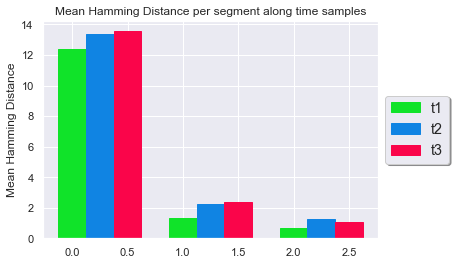

In [239]:
t1_HD_Mean = seg_Mean_HD_s1.iloc[0,:]
t2_HD_Mean = seg_Mean_HD_s1.iloc[1,:]
t3_HD_Mean = seg_Mean_HD_s1.iloc[2,:]

barWidth = 0.25

t1_bar_height = np.arange(len(t1_HD_Mean))
t2_bar_height = np.arange(len(t2_HD_Mean))
t3_bar_height = np.arange(len(t3_HD_Mean))

plt.bar(t1_bar_height, t1_HD_Mean, color='#10e329', width=barWidth, edgecolor='#10e329', label='t1')
plt.bar(t2_bar_height + 0.5*width, t2_HD_Mean, color='#1084e3', width=barWidth, edgecolor='#1084e3', label='t2')
plt.bar(t3_bar_height + width, t3_HD_Mean, color='#fa054a', width=barWidth, edgecolor='#fa054a', label='t3')

#plt.xlabel('Sample 1', 'Sample 2', 'Sample 3')
plt.ylabel('Mean Hamming Distance')
plt.title('Mean Hamming Distance per segment along time samples')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize='large', fancybox=True, shadow=True)

#### Comparative analysis of mutation profile along time-points:

In [127]:
"""Check time 1, time 2, time 3, segments"""

'Check time 1, time 2, time 3, segments'

In [128]:
mutations = {'Total sequences':[1575,1884,1506],'Sequence Length':[178,188,171],'Total positions':[280350,354192,257526],
             'Number unique sequences':[269,526,409],'Percentage unique sequences':[17.08,27.92,27.16],
             'Insertions':[0,0,0],'Deletions':[40991,66017,28648],'Percentage Deletions':[14.62,18.64,11.12],
             'Substitutions':[22818,33703,25614],'Percentage substitutions':[8.14,9.52,9.95],
            'Segment1 (seg1)':[19471,25188,20412],'Segment2 (seg2)':[2122,4222,3534],'Segment3 (seg3)':[1101,2410,1584],
             'Percentage Mutations seg1':[20.60,26.65,22.59],'Percentage Mutations seg2':[1.88,3.73,2.80],'Percentage Mutations seg3':[1.22,2.67,2.10]}
mutationsDF = pd.DataFrame.from_dict(mutations, orient='index',columns=['Time1', 'Time2', 'Time3'])
mutationsDF

,Time1,Time2,Time3
Total sequences,1575.00,1884.00,1506.00
Sequence Length,178.00,188.00,171.00
Total positions,280350.00,354192.00,257526.00
Number unique sequences,269.00,526.00,409.00
Percentage unique sequences,17.08,27.92,27.16
Insertions,0.00,0.00,0.00
Deletions,40991.00,66017.00,28648.00
Percentage Deletions,14.62,18.64,11.12
Substitutions,22818.00,33703.00,25614.00
Percentage substitutions,8.14,9.52,9.95


In [240]:
print(percentageUnique_s1t1,percentageUnique_s1t2,percentageUnique_s1t3)
print(percentageUnique_s2t1,percentageUnique_s2t2,percentageUnique_s2t3)
print(percentageUnique_s3t1,percentageUnique_s3t2,percentageUnique_s3t3)

17.142857142857142 27.9723991507431 27.224435590969456
9.450950306153468 9.747623023675493 17.093854216293472
10.407993338884262 10.688420877382836 19.845743102936815


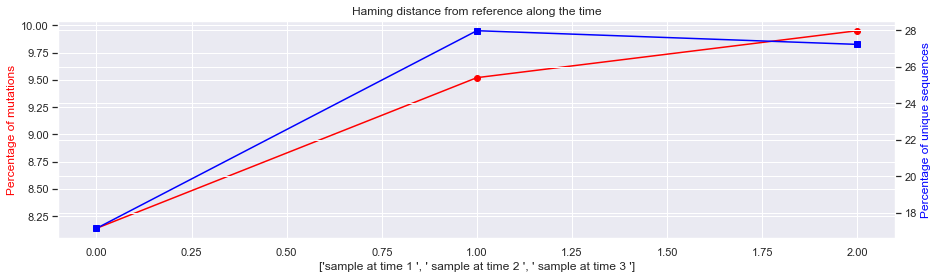

In [250]:
samples = ['sample at time 1 ', ' sample at time 2 ', ' sample at time 3 ']
percentage_TotalDistance = [8.14,9.52,9.95]
percent_Unique = [17.14, 27.97, 27.22]
fig, ax = plt.subplots(figsize=(15,4))
ax.set_title('Haming distance from reference along the time')
ax.plot(percentage_TotalDistance, color ='red', marker = 'o')
ax.set_xlabel(samples)
ax.set_ylabel('Percentage of mutations', color = 'red', fontsize = 12)
ax2 = ax.twinx()
ax2.plot(percent_Unique, color = 'blue', marker = 's')
ax2.set_ylabel('Percentage of unique sequences', color ='blue', fontsize = 12)
fig.subplots_adjust(wspace = 0.5)
# help from https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
# http://scipy-lectures.org/intro/matplotlib/auto_examples/options/plot_linestyles.html

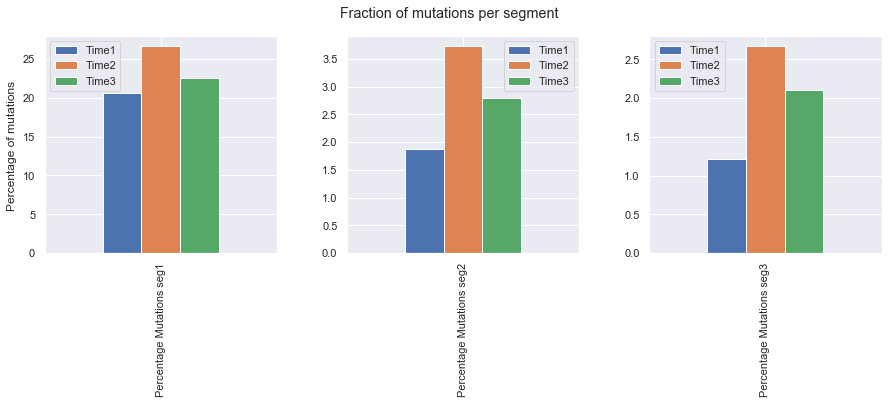

In [243]:
"""Adjusted to the number of sequence in each sample"""
mutations_plot1 = mutationsDF.iloc[13:14,0:]
mutations_plot2 = mutationsDF.iloc[14:15,0:]
mutations_plot3 = mutationsDF.iloc[15:16,0:]
fig = plt.figure(figsize=(15,4))
ax0=fig.add_subplot(131)
ax1=fig.add_subplot(132)
ax2=fig.add_subplot(133)
mutations_plot1.plot(ax = ax0, kind='bar')
mutations_plot2.plot(ax = ax1, kind='bar')
mutations_plot3.plot(ax = ax2, kind='bar')
fig.suptitle('Fraction of mutations per segment')
fig.text(0.095, 0.5, 'Percentage of mutations', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(wspace = 0.3)

#### Baic statistics for the hamming distance profile across samples:

In [132]:
stats_splitedSeq1_HD = splitedSeq1_HD.agg({'mean', 'std', 'min', 'max'})
stats_splitedSeq2_HD = splitedSeq2_HD.agg({'mean', 'std', 'min', 'max'})
stats_splitedSeq3_HD = splitedSeq3_HD.agg({'mean', 'std', 'min', 'max'})

In [133]:
stats_summary1 = pd.concat([stats_splitedSeq1_HD.hd1_1,stats_splitedSeq2_HD.hd2_1,stats_splitedSeq3_HD.hd3_1], axis=1)
stats_summary2 = pd.concat([stats_splitedSeq1_HD.hd1_2,stats_splitedSeq2_HD.hd2_2,stats_splitedSeq3_HD.hd3_2], axis=1)
stats_summary3 = pd.concat([stats_splitedSeq1_HD.hd1_3,stats_splitedSeq2_HD.hd2_3,stats_splitedSeq3_HD.hd3_3], axis=1)
stats_summary = pd.concat([stats_summary1,stats_summary2,stats_summary3], axis=1)
stats_summary

,hd1_1,hd2_1,hd3_1,hd1_2,hd2_2,hd3_2,hd1_3,hd2_3,hd3_3
mean,12.362540,13.369427,13.553785,1.347302,2.240977,2.346614,0.699048,1.279193,1.051793
max,29.000000,29.000000,37.000000,15.000000,21.000000,20.000000,17.000000,18.000000,15.000000
std,1.634288,3.420354,3.864494,1.578731,3.179411,3.415916,1.523085,2.386137,2.120923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


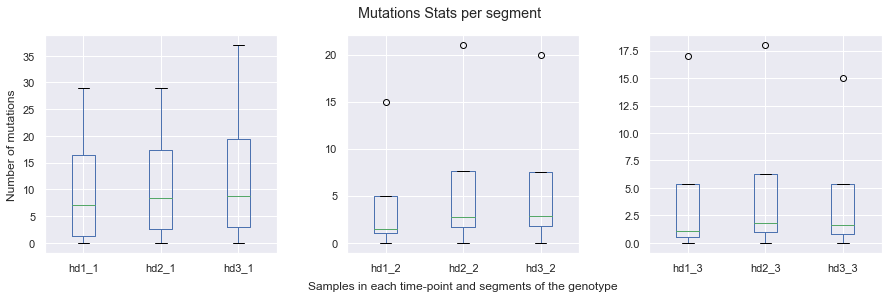

In [134]:
stats_plot1 = stats_summary.iloc[:,0:3]
stats_plot2 = stats_summary.iloc[:,3:6]
stats_plot3 = stats_summary.iloc[:,6:9]
fig = plt.figure(figsize=(15,4))
ax0=fig.add_subplot(131)
ax1=fig.add_subplot(132)
ax2=fig.add_subplot(133)
stats_plot1.boxplot(ax = ax0)
stats_plot2.boxplot(ax = ax1)
stats_plot3.boxplot(ax = ax2)
fig.suptitle('Mutations Stats per segment')
fig.text(0.512, 0.01, 'Samples in each time-point and segments of the genotype', ha='center', va='center')
fig.text(0.095, 0.5, 'Number of mutations', ha='center', va='center', rotation='vertical')
fig.subplots_adjust(wspace = 0.3)

### Conclusions

The total number of mutations had increased along the evolutionary time. However, the rate of mutation accumulation is more steep during the first part of the evolution and then it slows down. It is possible to see that the mutations do not accumulate equally along the sequence. The mean number of mutations accumulated in the first segment (about 13) is approximately ten times more than the other two segments (about 1.6). This differential accumulation of mutations is expected because the end of the sequence is not paired and thus it is more free to mutated. There is no pressure for complementary mutations to occur. Here we are analysis the DNA, which by being a reverse complement of the RNA shows most of the mutations occurring in the first segment.

Noteworthy, there are sequences that accumulate a greater number of mutations than the average and in similar proportions along the length. This is a cautionary measure of the quality of the data. It is worth to revise the processed perform upstream in the curating pipeline to make sure than there are no errors from the preparation procedure.